Importing the key libraries

In [5]:
import torch  
from matplotlib import pyplot as plt #For Rendering 
import numpy as np #For Data transformation 
import cv2 #Open-Cv
import os

Loading the Model 

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #To get a pre trained model from the torch hub
#Using the lightest model available to keep everything light for the raspberry pi

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-26 Python-3.11.7 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
#Run this to know the model structure
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Making Base Line Detections - Testing the Model with an image

In [4]:
#Used to pass in urls of images to check the model
img = 'https://th.bing.com/th/id/OIP.gzkVQWVgkZwhYJXS_0J9fwHaFW?rs=1&pid=ImgDetMain'

In [5]:
#Passing an image to the model to test.
results = model(img)
results.print()

image 1/1: 342x474 1 person, 19 cars
Speed: 2971.5ms pre-process, 2353.7ms inference, 516.9ms NMS per image at shape (1, 3, 480, 640)


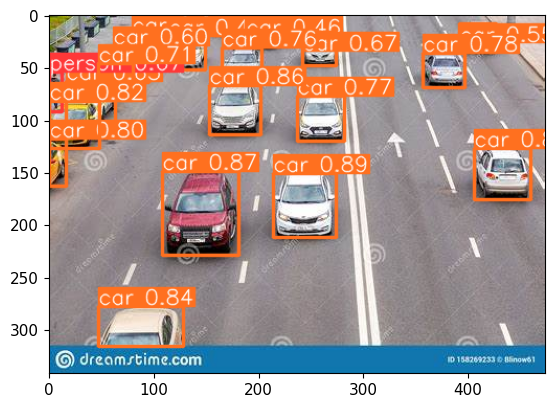

In [6]:
#To render the results with matplotlib 
#To use matplotlib lib as in line 
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Making base line detection with video - Using system camera or video file

In [9]:
# Define desired window size
desired_width = 640
desired_height = 480

# Define window name
window_name = 'Driver Drowsiness Detection - Pytorch'

# Open the video capture (replace with your video source)
cap = cv2.VideoCapture(0)  # Or use cap = cv2.VideoCapture('vide_name') for video

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:  # Handle frame read errors
        print("Error reading frame.")
        break

    # Make detections (replace with your YOLOv5 detection code)
    results = model(frame)

    # Resize the frame (optional, if you want to resize before detection)
    frame = cv2.resize(frame, (desired_width, desired_height))

    # Render the results (replace with your YOLOv5 rendering code)
    rendered_frame = np.squeeze(results.render())

    # Create or resize the window
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, desired_width, desired_height)

    # Show the resized frame with detections
    cv2.imshow(window_name, rendered_frame)

    # Handle key press for quitting
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Testing Trained Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2024-2-28 Python-3.11.7 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [23]:
img = os.path.join('data', 'images', 'using_mobile (19).jpg')

In [24]:
results = model(img)

In [25]:
results.print()

image 1/1: 480x640 1 using_mobile
Speed: 133.7ms pre-process, 766.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


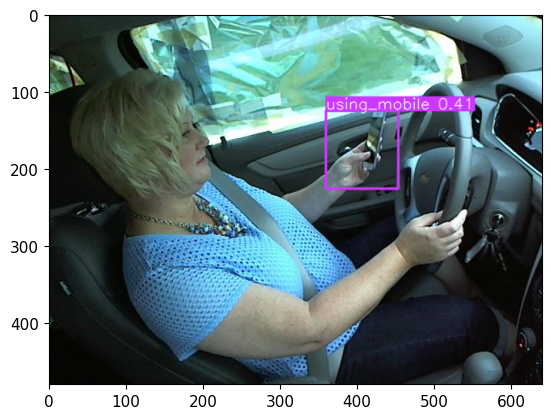

In [26]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()